## Exercício Zero
0. Transformação de uma imagem colorida em uma imagem em escala de cinza.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

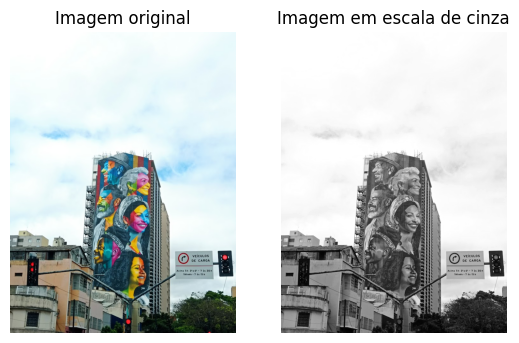

In [2]:
# Leitura de uma imagem colorida
foto = cv2.imread('img/kafka.jpg')

# Exibição da imagem original
plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(cv2.cvtColor(foto, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Conversão RGB para Grayscale
R = foto[:,:,0]  # matriz correspondente à componente RED
G = foto[:,:,1]  # matriz correspondente à componente GREEN
B = foto[:,:,2]  # matriz correspondente à componente BLUE

foto2 = 0.299 * R + 0.587 * G + 0.114 * B

# Exibição da imagem em escala de cinza
plt.subplot(1,2,2)
plt.title('Imagem em escala de cinza')
plt.imshow(foto2, cmap='gray')
plt.axis('off')
plt.show()

## Execício 1
1. Implementar função que receba uma imagem e calcule o seu negativo: s=L-1-r.
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as processadas.
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento.

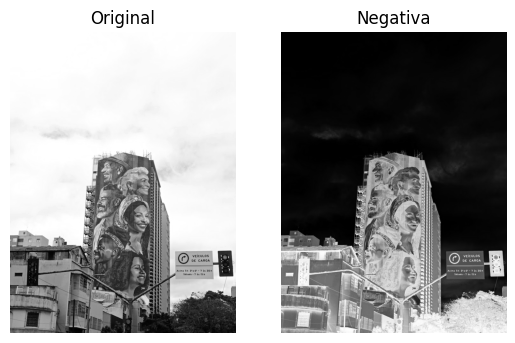

In [12]:
# Imagem original em escala de cinza
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada
foto_negativa = 255 - foto2
plt.subplot(1, 2, 2)
plt.title('Negativa')
plt.imshow(foto_negativa, cmap='gray')
plt.axis('off')
plt.show()




## Exercício 2
2. Implementar função que receba uma imagem e calcule a transformação logarítmica:
s=c*log(1+r)
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as
processadas. Varie a constante c.
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento.

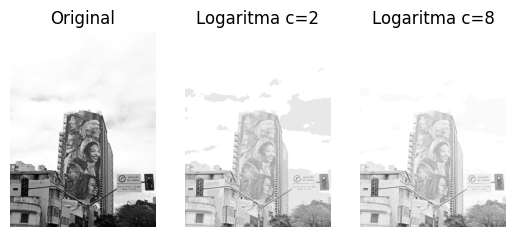

In [3]:
# Função para transformação logaritmica
def transformacao_logaritmica(imagem, c):
    imagem_transformada = c * np.log(1 + imagem)
    # Normalizar os valores para o intervalo [0, 255]
    imagem_transformada = np.clip(imagem_transformada, 0, 255).astype(np.uint8)
    return imagem_transformada

# Imagem original em escala de cinza
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada com c=2
c = 2 
foto_logarithm = transformacao_logaritmica(foto2, c)
plt.subplot(1, 3, 2)
plt.title('Logaritma c=2')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')

# Imagem tratada com c=8
c = 8
foto_logarithm = transformacao_logaritmica(foto2, c)
plt.subplot(1, 3, 3)
plt.title('Logaritma c=8')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')
plt.show()

## Exercício 3
3. Implementar função que receba uma imagem e calcule a transformação de potência (ou de
radiciação): s=c rγ
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as
processadas. Varie as constantes c e γ, incluindo valores positivos e negativos para γ.
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento.

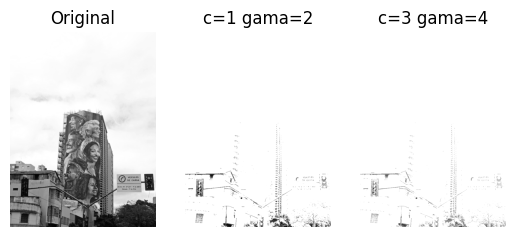

In [9]:
# Função para transformação logaritmica
def transformada_potencia(imagem, gama, c):
    imagem_transformada = c * (imagem**gama)
    imagem_transformada = np.clip(imagem_transformada, 0, 255).astype(np.uint8)
    return imagem_transformada

# Imagem original em escala de cinza
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada com c=2
c = 1
gama = 2 
foto_logarithm = transformada_potencia(foto2, gama, c)
plt.subplot(1, 3, 2)
plt.title('c=1 gama=2')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')

# Imagem tratada com c=8
c = 30
gama = 0.8
foto_logarithm = transformada_potencia(foto2, gama, c)
plt.subplot(1, 3, 3)
plt.title('c=3 gama=4')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')
plt.show()

## Exercício 4
4. Com base na curva genérica de transformação apresentada em aula (vide Figura 2), crie uma função que possibilite a escolha de r1, s1, r2, s2 de forma flexível.
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as processadas, escolhendo r1, r2, s1 e s2 para os seguintes casos: r1=rmin, s1=0, r2=rmax, s2=L-1 (alargamento de contraste), onde rmin e rmax são os níveis mínimos e máximos de intensidade da imagem. r1=r2=m e s1=0 e s2=L-1 (limiarização). Varie m.
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento

(-0.5, 709.5, 947.5, -0.5)

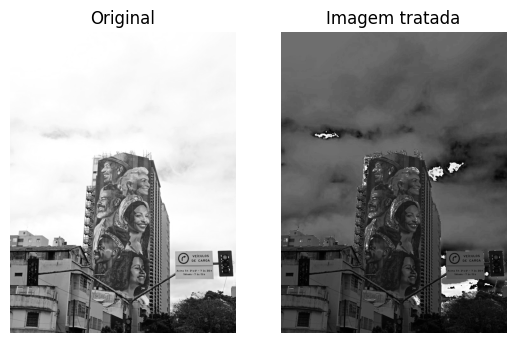

In [15]:
# Função para transformação
def curva(img_orig, r1, r2, s1, s2):
    # Níveis de cinza
    L = 256
    img_orig = np.double(img_orig)
    img_saida = np.zeros_like(img_orig, dtype=np.double)  # Inicializa img_saida
    
    if r1 == 0:
        a1 = 1
    else:
        a1 = np.double(s1 / r1)

    if r2 == r1:
        a2 = 1
    else:
        a2 = np.double((s2 - s1) / (r2 - r1))

    if r2 == (L - 1):
        a3 = 1
    else:
        a3 = np.double((L - 1 - s2) / (L - 1 - r2))

    img_saida[img_orig < r1] = img_orig[img_orig < r1] * a1
    img_saida[(r1 <= img_orig) & (img_orig <= r2)] = img_orig[(r1 <= img_orig) & (img_orig <= r2)] * a2
    img_saida[img_orig > r2] = img_orig[img_orig > r2] * a3

    # Normalização
    img_saida = np.uint8(img_saida)
    return img_saida

# Imagem original em escala de cinza
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada com c=2
c = 1
gama = 2 
foto_logarithm = curva(foto2, 0, 210, 0, 100)
plt.subplot(1, 2, 2)
plt.title('Imagem tratada')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')

## Exercício 5
5. Implemente uma função que crie alterações nas intensidades conforme a Figura 3.
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as 
processadas. 
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento.

(-0.5, 709.5, 947.5, -0.5)

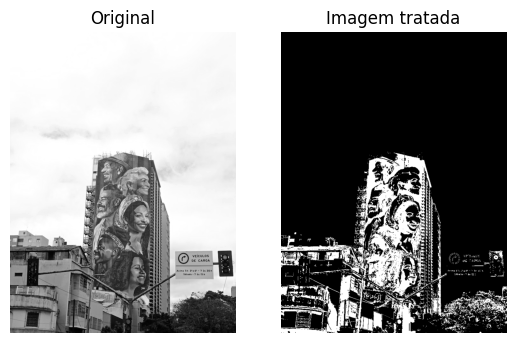

In [16]:
# Função para transformação
def lim(img_orig, A, B, s1, s2):
    img_orig = np.double(img_orig)
    img_saida = np.zeros_like(img_orig, dtype=np.double)  # Inicializa img_saida

    img_saida[img_orig < A] = s1
    img_saida[(A <= img_orig) & (img_orig <= B)] = s2
    img_saida[img_orig > B] = s1

    # Normalização
    img_saida = np.uint8(img_saida)
    return img_saida

# Imagem original em escala de cinza
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada com c=2
c = 1
gama = 2 
foto_logarithm = lim(foto2, 45, 125, 0, 255)
plt.subplot(1, 2, 2)
plt.title('Imagem tratada')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')

## Exercício 6
6. Implemente uma função que crie alterações nas intensidades conforme a Figura 4.
<br>A) Aplique a imagens de sua base de dados, comparando as imagens originais com as 
processadas. 
<br>B) Comente os resultados, fazendo uma breve “crítica” sobre o processamento.

(-0.5, 709.5, 947.5, -0.5)

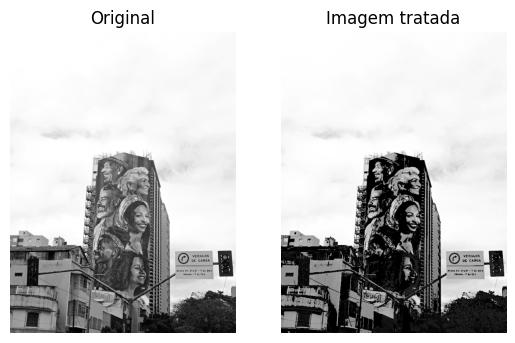

In [17]:
# Função para transformação
def lim2(img_orig, A, B, lim):
    img_orig = np.double(img_orig)
    img_saida = np.zeros_like(img_orig, dtype=np.double)  # Inicializa img_saida

    img_saida[img_orig < A] = img_orig[img_orig < A]
    img_saida[(A <= img_orig) & (img_orig <= B)] = lim
    img_saida[img_orig > B] = img_orig[img_orig > B]

    # Normalização
    img_saida = np.uint8(img_saida)
    return img_saida

# Imagem original em escala de cinza
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(foto2, cmap='gray')
plt.axis('off')

# Imagem tratada com c=2
c = 1
gama = 2 
foto_logarithm = lim2(foto2, 45, 125, 0)
plt.subplot(1, 2, 2)
plt.title('Imagem tratada')
plt.imshow(foto_logarithm, cmap='gray')
plt.axis('off')